<a href="https://colab.research.google.com/github/abidshafee/autoML-tsModel/blob/main/AutoML_ts_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install auto_ts
!pip install dask_xgboost
!pip install desk

In order to use Dask's parallelized dataframes (built on top of pandas), you have to tell pip to install some "extras" ([reference ](https://packaging.python.org/installing/#installing-setuptools-extras)), as mentioned in the [Dask installation documentation](http://dask.pydata.org/en/latest/install.html#pip):

`pip install "dask[dataframe]"` Or `pip install "dask[complete]"`

In [ ]:
!pip install "dask[complete]" #sol to auto_ts import error

In [37]:
import auto_ts as ts
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from datetime import datetime

In [2]:
from google.colab import files
uploaded = files.upload()

Saving throughput_metrics.csv to throughput_metrics.csv


In [12]:
df = pd.read_csv("throughput_metrics.csv", parse_dates=['Time'], index_col='Time')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    8760 non-null   datetime64[ns]
 1   SiteA   8760 non-null   float64       
 2   SiteB   8760 non-null   float64       
 3   SiteC   8760 non-null   float64       
 4   SiteD   8760 non-null   float64       
 5   SiteE   8760 non-null   float64       
 6   SiteF   8760 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 479.2 KB


In [10]:
df.isna().any()

Time     False
SiteA    False
SiteB    False
SiteC    False
SiteD    False
SiteE    False
SiteF    False
dtype: bool

In [41]:
df.dropna() #incase any missing values in future data
df.head()

,SiteA,SiteB,SiteC,SiteD,SiteE,SiteF
Time,,,,,,
2018-01-01 08:00:00,1.411093e+10,1.109243e+09,8.289831e+07,56650005.21,1.117868e+07,827420.9772
2018-01-01 09:00:00,1.345362e+10,1.242256e+09,4.375739e+04,49307351.26,7.070847e+06,913017.6007
2018-01-01 10:00:00,1.216888e+10,2.006322e+09,4.315725e+04,56843652.59,5.132826e+07,874471.3644
2018-01-01 11:00:00,1.123120e+10,1.073181e+09,8.277154e+07,46645240.59,5.217827e+06,837246.7783
2018-01-01 12:00:00,1.078085e+10,8.645069e+08,3.343548e+04,30966947.37,7.495363e+06,827143.7497


In [26]:
SiteA = df[[df.columns[0]]]
SiteA

,SiteA
Time,
2018-01-01 08:00:00,1.411093e+10
2018-01-01 09:00:00,1.345362e+10
2018-01-01 10:00:00,1.216888e+10
2018-01-01 11:00:00,1.123120e+10
2018-01-01 12:00:00,1.078085e+10
...,...
2019-01-01 03:00:00,4.031000e+09
2019-01-01 04:00:00,8.101920e+09
2019-01-01 05:00:00,7.529417e+09


In [60]:
mpl.rcParams['figure.figsize'] = (13, 7)

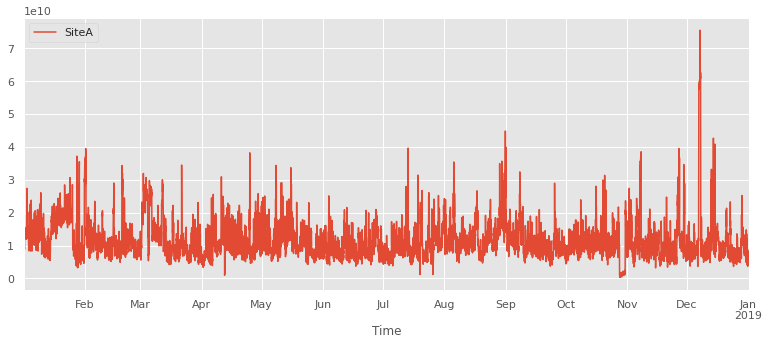

In [38]:
SiteA.plot()

In [28]:
SiteB = df[[df.columns[1]]]
SiteB

,SiteB
Time,
2018-01-01 08:00:00,1.109243e+09
2018-01-01 09:00:00,1.242256e+09
2018-01-01 10:00:00,2.006322e+09
2018-01-01 11:00:00,1.073181e+09
2018-01-01 12:00:00,8.645069e+08
...,...
2019-01-01 03:00:00,8.216592e+09
2019-01-01 04:00:00,8.529913e+09
2019-01-01 05:00:00,8.250299e+09


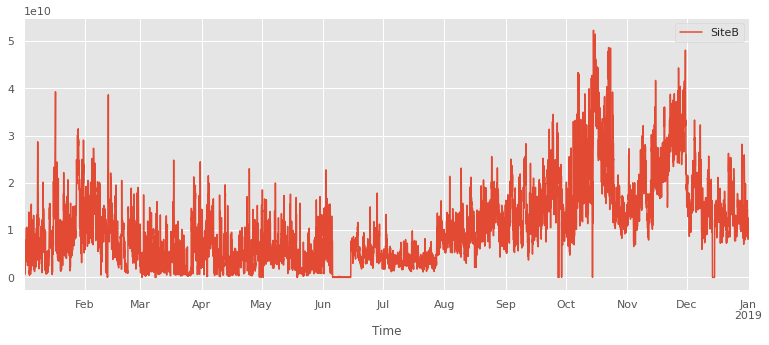

In [39]:
SiteB.plot()

In [31]:
SiteC = df[[df.columns[2]]]
SiteC

,SiteC
Time,
2018-01-01 08:00:00,8.289831e+07
2018-01-01 09:00:00,4.375739e+04
2018-01-01 10:00:00,4.315725e+04
2018-01-01 11:00:00,8.277154e+07
2018-01-01 12:00:00,3.343548e+04
...,...
2019-01-01 03:00:00,4.036552e+07
2019-01-01 04:00:00,4.194376e+07
2019-01-01 05:00:00,4.499228e+04


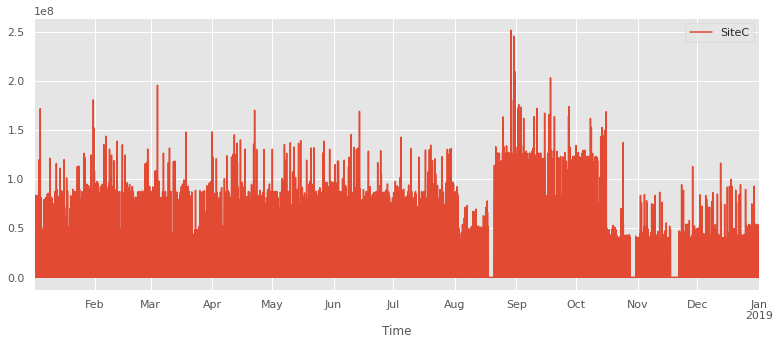

In [40]:
SiteC.plot()

In [45]:
Apr_df = df.loc['2018-4']

In [47]:
SiteA_apr = Apr_df[[Apr_df.columns[0]]]

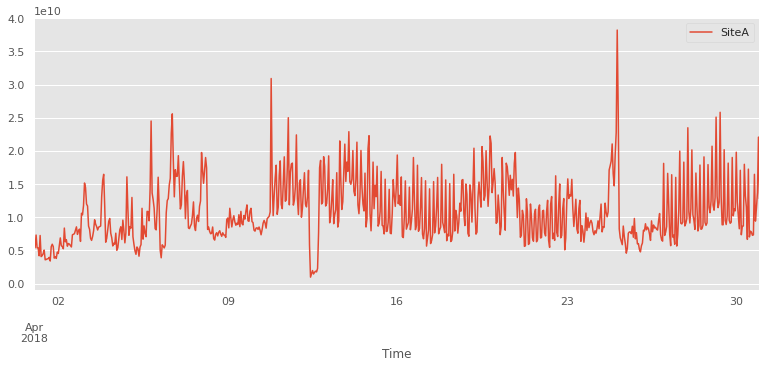

In [48]:
SiteA_apr.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6aab15d90>,
      dtype=object)

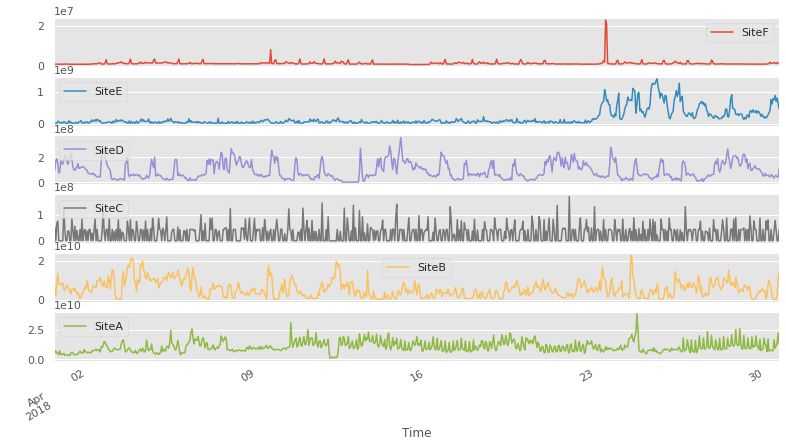

In [66]:
# Plotting all features together
Apr_df[['SiteF','SiteE','SiteD','SiteC','SiteB','SiteA']].plot(subplots=True)